In [3]:
import pandas as pd
df=pd.read_csv("c:/data/iris/iris2.csv")

df.head()

,Sepallength,Sepalwidth,Petallength,Petalwidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [4]:
cols=['Sepallength', 'Sepalwidth', 'Petallength', 'Petalwidth']
X=df[cols]
y=df['Species']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [6]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [7]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.9666666666666667


In [9]:
from sklearn.model_selection import GridSearchCV
params={
    'max_depth':list(range(1,11)),
    'criterion':['gini','entropy'],
    'max_leaf_nodes': list(range(2,11)),
    'min_samples_split': [2,3,4]
}
gcv=GridSearchCV(model, params, cv=3)
gcv.fit(X,y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4]})

In [10]:
gcv.cv_results_["params"][:5]

[{'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 2,
  'min_samples_split': 2},
 {'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 2,
  'min_samples_split': 3},
 {'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 2,
  'min_samples_split': 4},
 {'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 3,
  'min_samples_split': 2},
 {'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 3,
  'min_samples_split': 3}]

In [11]:
scores=gcv.cv_results_["mean_test_score"]
scores[:10]

array([0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66])

0.9733333333333333


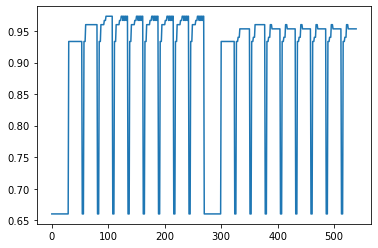

In [12]:
import matplotlib.pyplot as plt
print(max(scores))
plt.plot(scores)

In [13]:
print(gcv.best_score_)
print(gcv.best_params_)
print(gcv.best_estimator_)

0.9733333333333333
{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=4, max_leaf_nodes=7, random_state=0)


In [14]:
from sklearn.model_selection import cross_val_score
import numpy as np

tree=DecisionTreeClassifier(criterion='gini', max_depth=4, max_leaf_nodes=6,min_samples_split=2,
random_state=0)
result=cross_val_score(tree, X, y, cv=10)
print(result)
print(np.mean(result))

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]
0.96
